In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df = df.drop(['Unnamed: 0'], axis= 1)

In [7]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace = True)

In [10]:
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace = True)


In [11]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

In [13]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month    
df['year'] = df['pickup_datetime'].dt.year
df['day_of_week'] = df['pickup_datetime'].dt.day_of_week

In [14]:
df.drop(['pickup_datetime'], axis = 1, inplace = True)

In [15]:
df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


fare_amount             AxesSubplot(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         AxesSubplot(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        AxesSubplot(0.125,0.560732;0.352273x0.0939024)
passenger_count      AxesSubplot(0.547727,0.560732;0.352273x0.0939024)
hour                    AxesSubplot(0.125,0.448049;0.352273x0.0939024)
day                  AxesSubplot(0.547727,0.448049;0.352273x0.0939024)
month                   AxesSubplot(0.125,0.335366;0.352273x0.0939024)
year                 AxesSubplot(0.547727,0.335366;0.352273x0.0939024)
day_of_week             AxesSubplot(0.125,0.222683;0.352273x0.0939024)
dtype: object

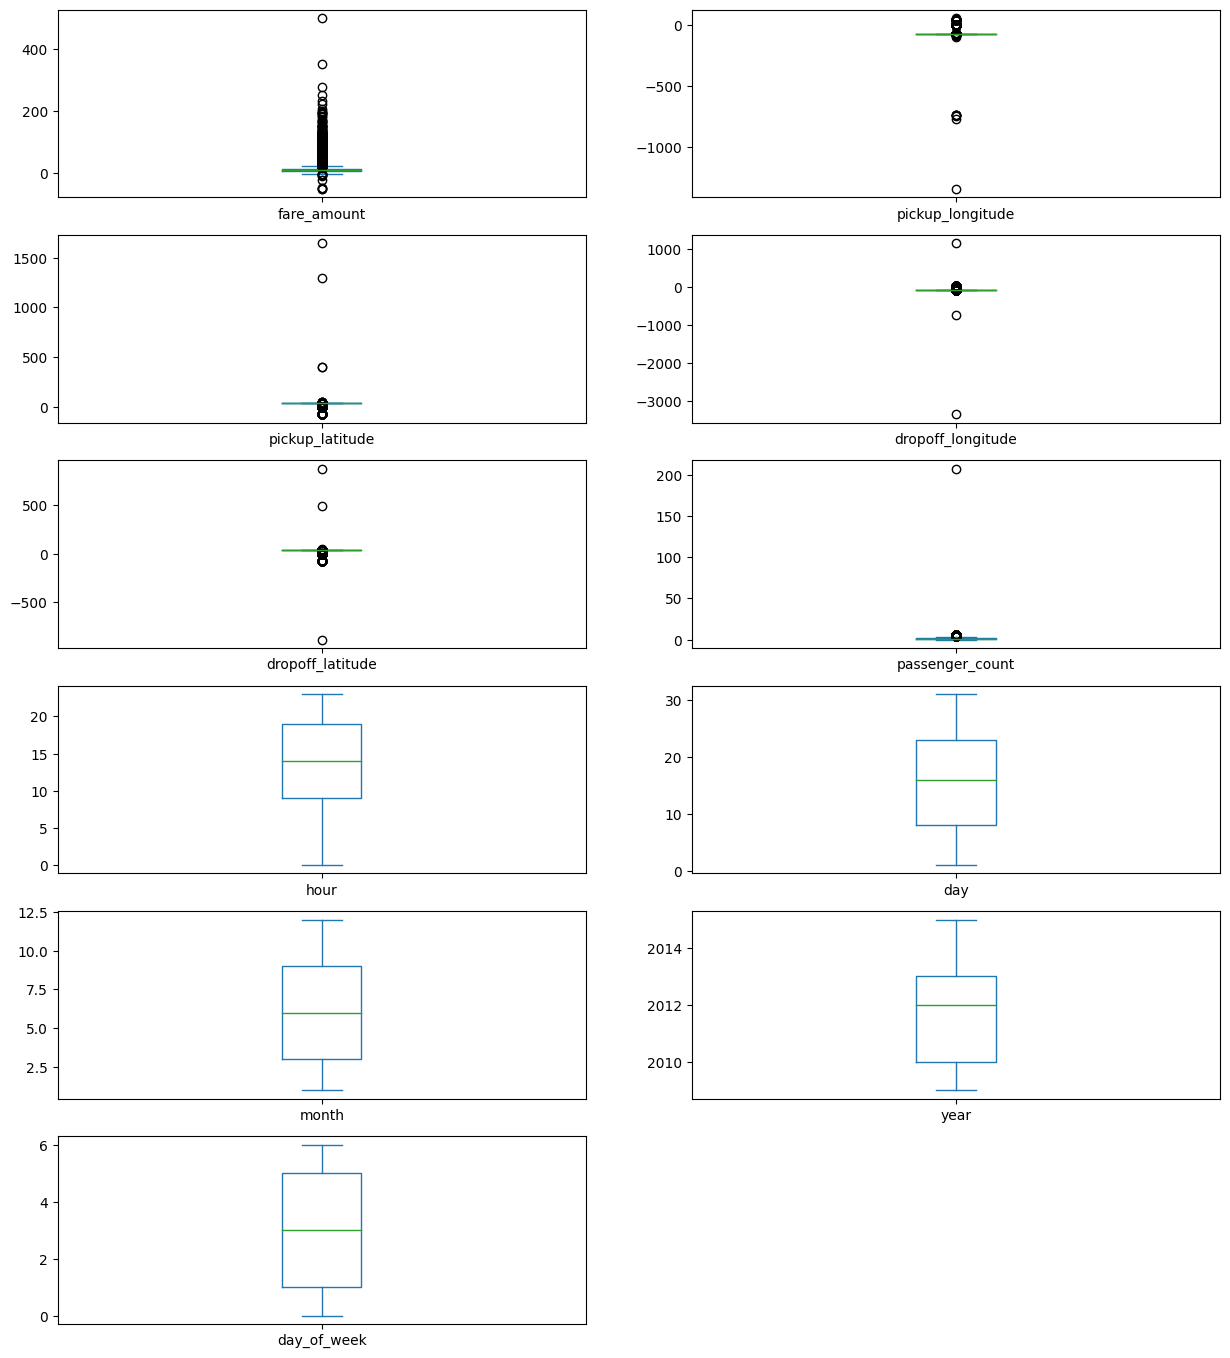

In [16]:
df.plot(kind='box', subplots=True, layout= [7,2], figsize=[15,20])

In [17]:
df.shape

(200000, 12)

In [18]:
df.dtypes

key                   object
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
day_of_week            int64
dtype: object

In [19]:
df.drop('key', axis = 1, inplace = True)

In [20]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
day_of_week            int64
dtype: object

In [21]:
import numpy as np

In [22]:
def remove_outlier(df1,col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    print(Q1)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 *IQR
    df[col] = np.clip(df1[col], low, high)
    return df1

In [23]:
def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df, c)
    return df1

In [24]:
df = treat_outliers_all(df, df.iloc[:, 0::])

6.0
-73.992065
40.73479575
-73.991407
40.733823
1.0
9.0
8.0
3.0
2010.0
1.0


In [25]:
df.shape

(200000, 11)

fare_amount             AxesSubplot(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         AxesSubplot(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        AxesSubplot(0.125,0.560732;0.352273x0.0939024)
passenger_count      AxesSubplot(0.547727,0.560732;0.352273x0.0939024)
hour                    AxesSubplot(0.125,0.448049;0.352273x0.0939024)
day                  AxesSubplot(0.547727,0.448049;0.352273x0.0939024)
month                   AxesSubplot(0.125,0.335366;0.352273x0.0939024)
year                 AxesSubplot(0.547727,0.335366;0.352273x0.0939024)
day_of_week             AxesSubplot(0.125,0.222683;0.352273x0.0939024)
dtype: object

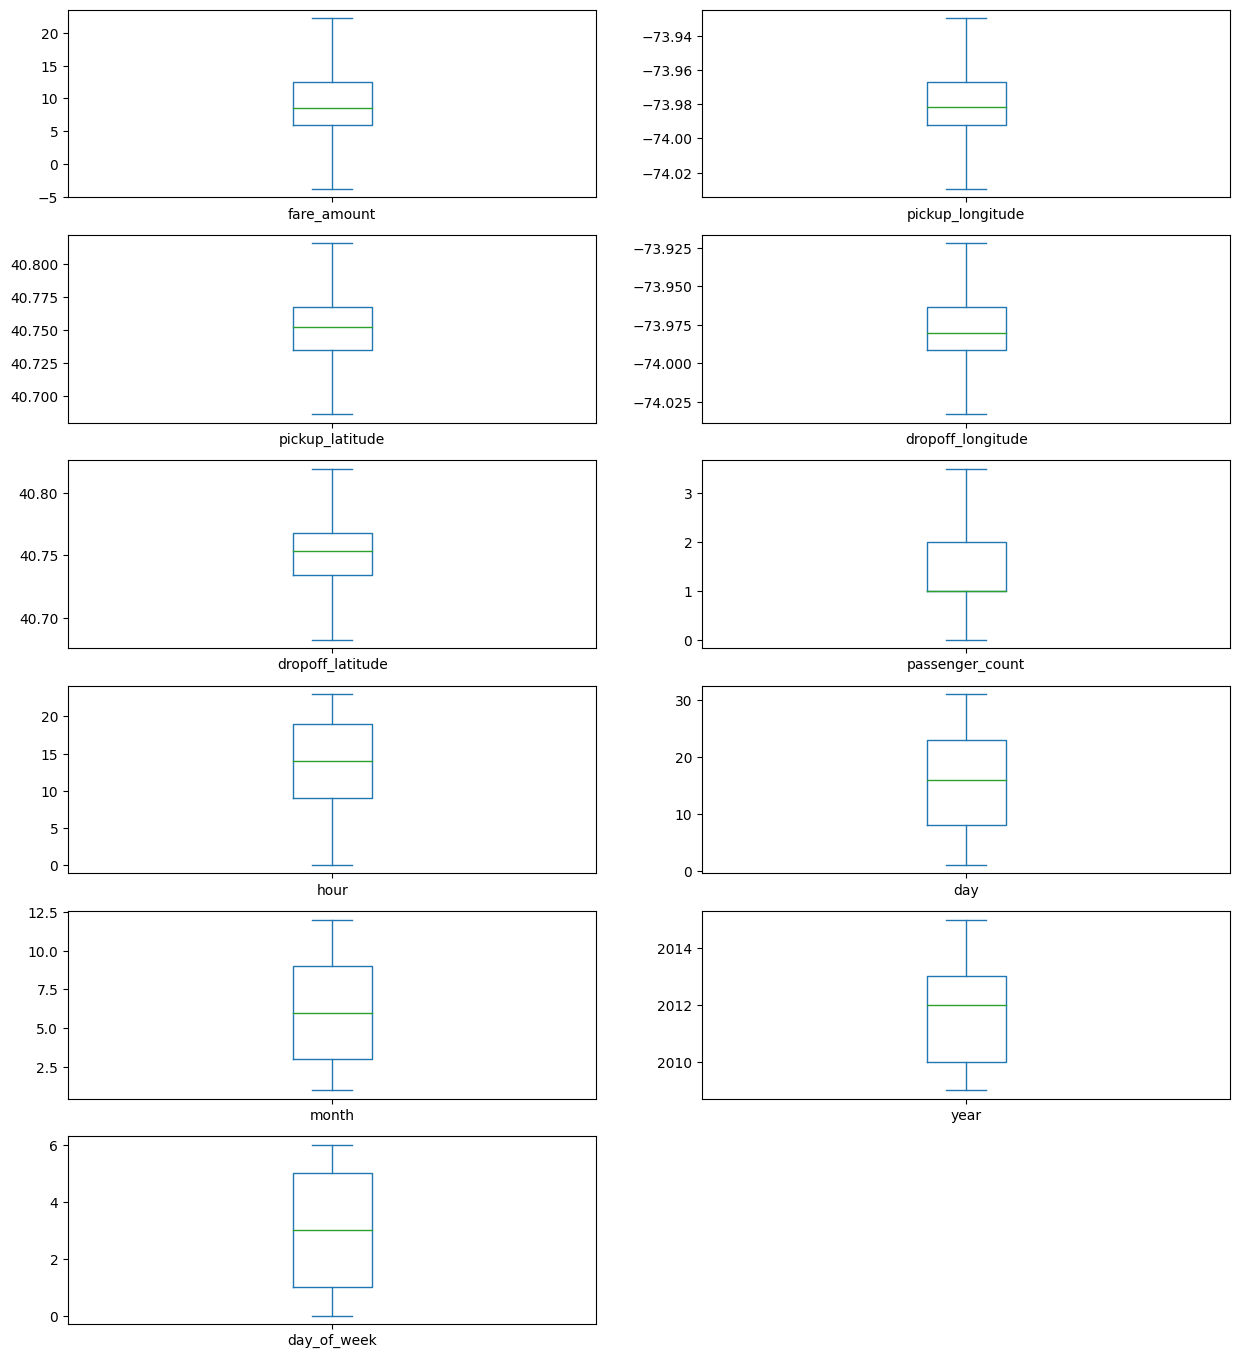

In [26]:
df.plot(kind='box', subplots=True, layout= [7,2], figsize=[15,20])

In [27]:
# %pip install haversine

In [32]:
df.drop([df.pickup_longitude <-180 or df.pickup_longitude > 180] , inplace = True)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [37]:
import haversine as hs
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
    long1, lati1 , long2, lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude']]
    loc1 = (lati1, long1)
    loc2 = (lati2, long2)
    c = hs.haversine(loc1, loc2)
    travel_dist.append(c)

print(travel_dist)
df['dist_travel_km'] = travel_dist

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [34]:
incorrect_coordinates=df.loc[(df.pickup_latitude>90)|(df.pickup_latitude<-90)|(df.dropoff_latitude>90)|(df.dropoff_latitude<-90)|(df.pickup_longitude>180)|(df.pickup_longitude<-180)|(df.dropoff_longitude > 90)|(df.dropoff_longitude < -90)]

In [35]:
df.drop(incorrect_coordinates, inplace = True , errors = 'ignore')

In [36]:
df.shape

(200000, 11)

In [38]:
# %pip install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.6 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.6 kB 469.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.6 kB 438.9 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/294.6 kB 492.8 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.6 kB 700.2 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.6 kB 724.0 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.6 kB 656.8 kB/s eta 0:00:01
   ---------------------------------- --- 266.2/294.6 kB 630.5 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.6 kB 610.3 kB/s eta 0:00:01
   -------------------------------------- 294.6/294.6 kB 607.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
import seaborn as sns


<AxesSubplot:>

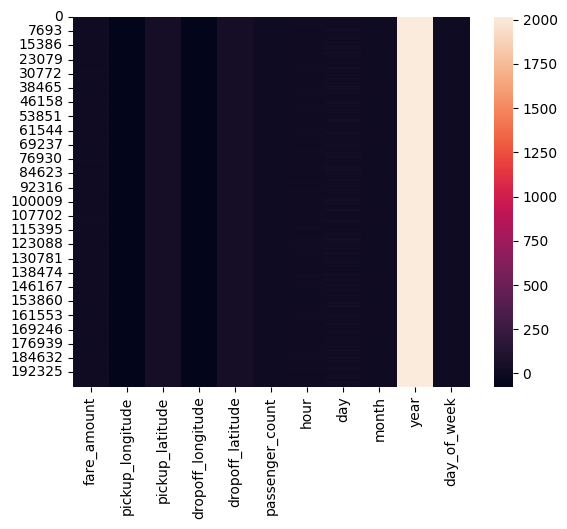

In [40]:
sns.heatmap(df)

In [41]:
corr = df.corr()

In [42]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245627,-0.009325,-0.046578,-0.004027,0.002394,0.011355,-0.003349
dropoff_latitude,-0.125898,0.073290,0.515714,0.245627,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550
hour,-0.023623,0.011579,0.029681,-0.046578,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947
day,0.004534,-0.003204,-0.001553,-0.004027,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617
month,0.030817,0.001169,0.001562,0.002394,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786
year,0.141277,0.010198,-0.014243,0.011355,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113


<AxesSubplot:>

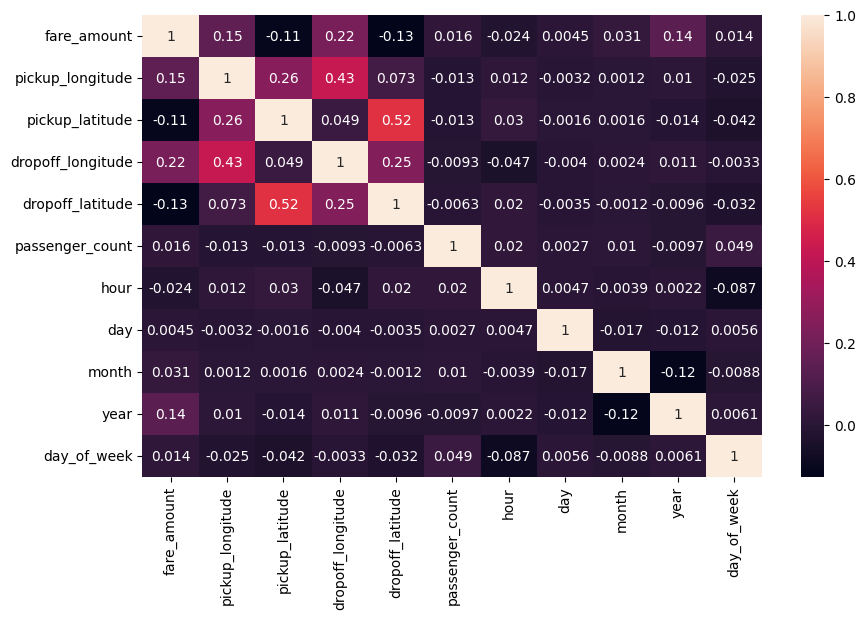

In [43]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(figsize =(10,6))
sns.heatmap(df.corr(),annot = True)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'day_of_week'],
      dtype='object')

In [47]:
x = df[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'day_of_week']]
y = df['fare_amount']

In [48]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size = 0.33)

In [58]:
regression = LinearRegression()

In [59]:
regression.fit(X_train,y_train)

LinearRegression()

In [60]:
regression.intercept_

6491.048045641522

In [61]:
regression.coef_

array([ 2.27507518e+01, -1.37545163e+01,  5.26420573e+01, -2.86980676e+01,
        1.17496488e-01, -6.02431978e-03,  3.53548812e-03,  7.23888523e-02,
        4.10408758e-01,  2.13267727e-02])

In [62]:
prediction = regression.predict(X_test)

In [63]:
prediction

array([9.22054829, 9.79214817, 9.05377489, ..., 7.77292528, 7.33480897,
       9.86209314])

In [64]:
from sklearn.metrics import r2_score, mean_squared_error

In [65]:
MSE = mean_squared_error(y_test, prediction)
MSE

26.31405281276718

In [66]:
RMSE = np.sqrt(MSE)
RMSE

5.129722488864985